# Natural Language Processing of TikTok comments on content promoting fast fashion

### Analysing how social media drives consumption through sentiment analysis

**Irina Martin**

Through this analysis, I aim to analyse how social media drives consumption. Social media is actively used by 4 billion people according to Statista. Social media exposes people to various types of information, including advertisment and product promotion. Often, the people who advertise certain products are also users, who perform these paid promotions to drive sales (Manneh, 2017).TikTok has become a platform for paid promotions, but a lot of the video content online that promotes various items does not transparently say that they are a paid promoter.

**My research question for this project is:**

*Does social media content drive the consumption of fast fashion among TikTok users?*

**Methodology**

In order to perform this analysis, I have started by collecting the data and creating a dataset from TikTok data. I used API's from the popular social media platform to collect comments under three TikToks. The content selected represents video content on various garments from known fast fashion brands. The content was created in order to promote specific garments from different fast fashion brands such as Zara, Mango and Stradivarius. By analysing the comments I am trying to estimate how many of the commenters are wanting to buy the products in the video after viewing. A lot of these comments are a clear indicator because people often ask for the 'product code' or 'reference code' to be able to find the product online or express that they want to buy what is presented in the video.

Therefore, I have selected 208 comments from under 3 video content promoting fast fashion from TikTok. I will be looking for the frequency of the words to understand what are the main words and whether they support my hypothesis that social media drives fast fashion. According to literature, 'most basic quantitative output available from the programs is a word count, reporting the frequency of each word occurring in a text or a set of texts' (Neuendorf, 2017).

Furthermore, it is an important aspect to consider user engagement metrics such as likes, shares, and how many likes and replies comments have. It is important to note that the dataset does not contain all the comments existent under these 3 TikToks as a lot of them were deleted to make the dataset smaller for this assignment.

In the second part of the analysis, I will perform topic modeling to understand what other types of reactions these videos can get. Because the two of the three videos contain content creators promoting certain garments while trying them on, and the other video promotes garments without trying them on, the topics arrising in the comments might be different. Often, the content creators are people that might fit into certain body types and categories of beauty standards, sometimes leaving some of the users with a negative sense of body image. Because some comments express that through words refering to body parts and body attributes such as 'shoulders', 'tall', 'fat', 'ugly' this can be categorised in a different topic other than consumption.


## Data pre-processing and data cleaning

Having scraped around 300 comments initially, I then manually cleaned comments that didn't represent importance such as incoherent text. In order to proceed with the coding, I am uploaded the necessary packages and uploading and exploring the dataset.



In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [5]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1wZ-UZ9mcebLDq-xpPzkq_DrniWlF8dX6

Downloading...
From: https://drive.google.com/uc?id=1wZ-UZ9mcebLDq-xpPzkq_DrniWlF8dX6
To: /content/TikTok comments.xlsx
100% 20.2k/20.2k [00:00<00:00, 33.5MB/s]


In [7]:
fp = "TikTok comments.xlsx"
df = pd.read_excel(fp, header=None, skiprows=1)
df.head()

,0,1,2,3
0,7146651896115037190,My broad shoulders and fat arms say no,https://www.tiktok.com/@elisamariastyle/video/...,717
1,7073313397429601285,I prefer ones from Massimo Dutti :) those are ...,https://www.tiktok.com/@elisamariastyle/video/...,46
2,6982095142217253889,Literally went to mango and got it,https://www.tiktok.com/@elisamariastyle/video/...,61
3,6802557867163862022,Wait I need,https://www.tiktok.com/@elisamariastyle/video/...,9
4,6828575644847850501,I want it!,https://www.tiktok.com/@elisamariastyle/video/...,5


In [8]:
df.columns = ['id', 'text', 'link', 'diggCount']
df.head()

,id,text,link,diggCount
0,7146651896115037190,My broad shoulders and fat arms say no,https://www.tiktok.com/@elisamariastyle/video/...,717
1,7073313397429601285,I prefer ones from Massimo Dutti :) those are ...,https://www.tiktok.com/@elisamariastyle/video/...,46
2,6982095142217253889,Literally went to mango and got it,https://www.tiktok.com/@elisamariastyle/video/...,61
3,6802557867163862022,Wait I need,https://www.tiktok.com/@elisamariastyle/video/...,9
4,6828575644847850501,I want it!,https://www.tiktok.com/@elisamariastyle/video/...,5


In [9]:
print("Number of Rows:", df.shape[0])

Number of Rows: 204


In [11]:
excel_file_path = 'TikTok comments.xlsx'
comments_df = pd.read_excel(excel_file_path)

print(comments_df.columns)

# Checking the first few rows of the DataFrame to see the structure
print(comments_df.head())

Index(['id', 'text', 'link', 'diggCount'], dtype='object')
                    id                                               text  \
0  7146651896115037190             My broad shoulders and fat arms say no   
1  7073313397429601285  I prefer ones from Massimo Dutti :) those are ...   
2  6982095142217253889                 Literally went to mango and got it   
3  6802557867163862022                                        Wait I need   
4  6828575644847850501                                         I want it!   

                                                link  diggCount  
0  https://www.tiktok.com/@elisamariastyle/video/...        717  
1  https://www.tiktok.com/@elisamariastyle/video/...         46  
2  https://www.tiktok.com/@elisamariastyle/video/...         61  
3  https://www.tiktok.com/@elisamariastyle/video/...          9  
4  https://www.tiktok.com/@elisamariastyle/video/...          5  


In [10]:
import spacy

!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2023-12-14 13:12:51.476358: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-14 13:12:51.476447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-14 13:12:51.476485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-14 13:12:52.976874: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


After checking the structure of the dataset, an important part of pre-processing the text is to remove stopwords and lemmatize. However, I assume that because the comments are short, and because a lot of comments are made up of what can be considered stop words, removing them would affect the analysis negatively (Kedia, 2020).

In [12]:
# Tokenization, remove stopwords, and lemmatization
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary resources to process the text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords, punctuation, and non-alphabetic tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]

    return tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Furthermore, I have created tokens which will be considered in the Word Cloud and topic modeling, as well as the TF-IDF and correlation analysis. Tokens are an essential part of NLP because it turns a 'document into a list of
units' and further turns words into vectors so that the computer can read them (Kedia, 2020).

In [15]:
# Applying the preprocessing function to the comments column
df['processed_comments'] = df['text'].apply(preprocess_text)

# Displaying the processed data
print(df[['text', 'processed_comments']].head())

                                                text  \
0             My broad shoulders and fat arms say no   
1  I prefer ones from Massimo Dutti :) those are ...   
2                 Literally went to mango and got it   
3                                        Wait I need   
4                                         I want it!   

                    processed_comments  
0     [broad, shoulder, fat, arm, say]  
1  [prefer, one, massimo, dutti, fine]  
2        [literally, went, mango, got]  
3                         [wait, need]  
4                               [want]  


Creating a WordCloud is helpful in identifying the words frequency after the comments have been processed. I will proceed to display the words and their frequency in a bilinear word cloud.

In [16]:
pip install plotly wordcloud


In [17]:
import plotly.graph_objects as go

Creating a Word Cloud also helps emphasize terms based on their frequency in the dataset. We can see that the words 'code' which indicate possible consumption because the viewers are looking for the product code to purchase the garment being promoted. Therefore, in the Word Cloud, the size of the word reflects how often it occurs. 'Code' together with 'jeans' and 'top' reflect the frequency in comments asking for the product code for the specific jeans or top.

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# Flattening the list of lists in 'processed_comments'
all_comments = ' '.join(df['processed_comments'].explode().dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Convert WordCloud object to Pandas DataFrame for Plotly
word_freq_df = pd.DataFrame(wordcloud.words_.items(), columns=['word', 'frequency'])

# Creating an interactive bar chart using Plotly
fig = go.Figure(go.Bar(x=word_freq_df['word'], y=word_freq_df['frequency'], marker_color=word_freq_df['frequency'],
                       text=word_freq_df['frequency'], textposition='outside'))

# Updating layout for better readability
fig.update_layout(title='Word Frequency', xaxis_title='Word', yaxis_title='Frequency',
                  coloraxis_showscale=False)

# Figure
fig.show()

Furthermore, I hav decided to perform topic modelling after creating the Word Cloud. Therefore, proceeded to create a BagOfWords. Having a BoW is important for topic modeling (Kedia, 2020). At the same time the BoWs strengthens the investigation that some words are more frequent then others. However, an interesting observation is that as we can see, in the Word Cloud the word 'code' is the most frequent one and in the Bag of Words the word 'code' comes second, after the word 'top'.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the comments into a Bag of Words matrix
bow_matrix = vectorizer.fit_transform(df['processed_comments'].apply(lambda x: ' '.join(x)))

# Convert the matrix to a DataFrame for better inspection
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())


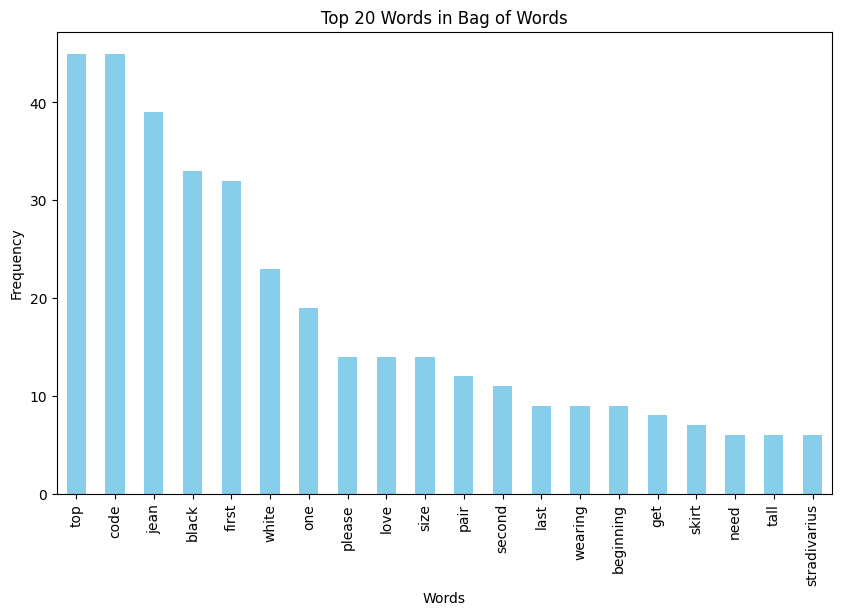

In [21]:
top_words = bow_df.sum(axis=0).sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Words in Bag of Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Topic modeling

In [22]:
from gensim import corpora, models
from pprint import pprint

# Convert the Bag of Words matrix to a gensim corpus
corpus = [list(zip(range(len(bow_df.columns)), count)) for count in bow_df.values]

# Create a gensim dictionary mapping word IDs to words
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=dict(enumerate(bow_df.columns)))

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dict(enumerate(bow_df.columns)), passes=15)

# Print the topics
pprint(lda_model.print_topics())


[(0,
  '0.083*"jean" + 0.066*"code" + 0.052*"first" + 0.041*"one" + 0.028*"black" + '
  '0.023*"pair" + 0.023*"love" + 0.020*"last" + 0.019*"wearing" + '
  '0.016*"beginning"'),
 (1,
  '0.111*"top" + 0.057*"white" + 0.051*"black" + 0.037*"code" + 0.024*"size" + '
  '0.021*"first" + 0.020*"please" + 0.018*"skirt" + 0.016*"need" + '
  '0.016*"tall"')]


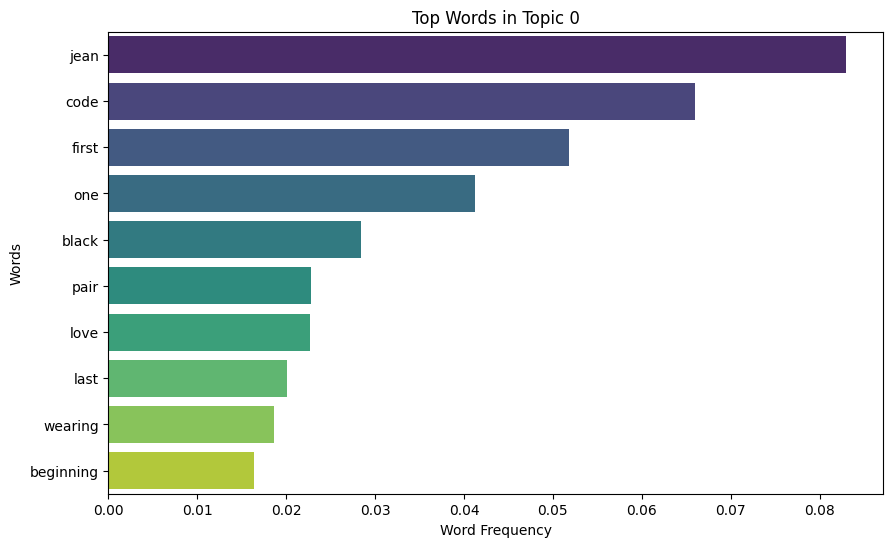

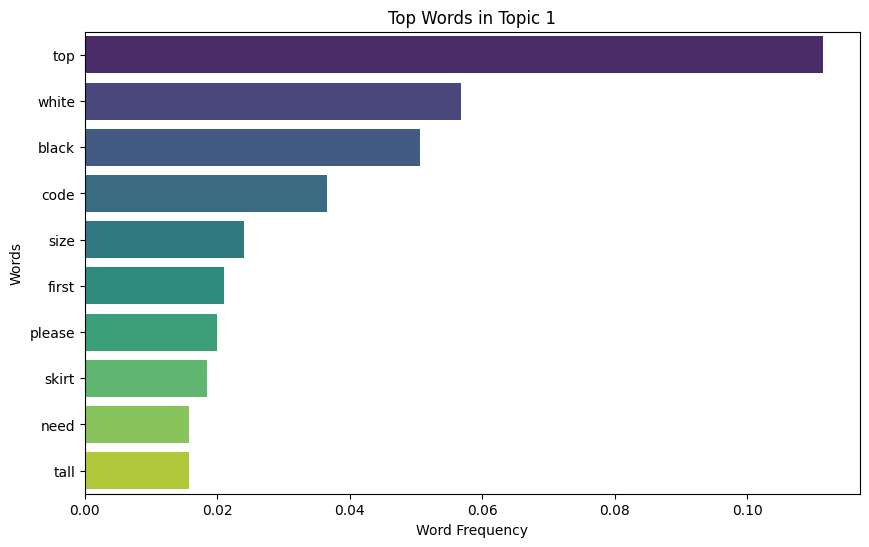

In [23]:
import seaborn as sns

# Function to display bar chart for a given topic
def display_top_words_bar_chart(topic_words, topic_number, num_words=10):
    sorted_words = sorted(topic_words.items(), key=lambda x: x[1], reverse=True)

    # Extract words and scores
    words, scores = zip(*sorted_words[:num_words])

    # Create a DataFrame for better plotting
    df = pd.DataFrame({'Word': words, 'Frequency': scores})

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df, palette='viridis')
    plt.title(f'Top Words in Topic {topic_number}')
    plt.xlabel('Word Frequency')
    plt.ylabel('Words')
    plt.show()

# Iterate through topics and display bar charts
for topic_number in range(lda_model.num_topics):
    topic_words = dict(lda_model.show_topic(topic_number))
    display_top_words_bar_chart(topic_words, topic_number)


Both topics seem to revolve around the fashion items and the codes. I would interpret the topics as the first one expresses more practicle discussions related to the fashion items while the second topic ephasizes the love for the fashion items and discussions about wanting the specific items involving looks and mentions of how tall someone might be. The initial assumption was that the topics will capture also more negative comments, yet that did not happen because the frequency of negative words is too small. Which is also why sentiment analysis might not be a good fit for this project.

Furthermore, I am going to perform a TF-IDF analysis to compare the results between the TF-IDF, the WordCloud and the Bag of Words. TF-IDF is ultimately used to weighten the importance of the words. The TF measures how often a term occurs, while the IDF measures the importance (Kedia, 2020, p. 85).


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

In [26]:
# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

In [27]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [28]:
# Display the TF-IDF DataFrame
print(tfidf_df.head())

   15606413  2nd  3rd  57013783  absolutely  adjustments   al  allll  amazing  \
0       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0      0.0   
1       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0      0.0   
2       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0      0.0   
3       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0      0.0   
4       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0      0.0   

   amy  ...  wearing      went  whats  wheres  white  wore  youre  zara  \
0  0.0  ...      0.0  0.000000    0.0     0.0    0.0   0.0    0.0   0.0   
1  0.0  ...      0.0  0.000000    0.0     0.0    0.0   0.0    0.0   0.0   
2  0.0  ...      0.0  0.531656    0.0     0.0    0.0   0.0    0.0   0.0   
3  0.0  ...      0.0  0.000000    0.0     0.0    0.0   0.0    0.0   0.0   
4  0.0  ...      0.0  0.000000    0.0     0.0    0.0   0.0    0.0   0.0   

   zaraing  écru  
0      0.0   0.0  
1      0.0   0.0  
2    

In [29]:
print(df['text'].head())

0               My broad shoulders and fat arms say no
1    I prefer ones from Massimo Dutti :) those are ...
2                   Literally went to mango and got it
3                                          Wait I need
4                                           I want it!
Name: text, dtype: object


In [30]:
print(df['text'].isnull().sum())

0


In [31]:
print(tfidf_vectorizer.get_feature_names_out())

['15606413' '2nd' '3rd' '57013783' 'absolutely' 'adjustments' 'al' 'allll'
 'amazing' 'amy' 'arms' 'article' 'babe' 'backless' 'bday' 'beautiful'
 'beginning' 'beige' 'best' 'black' 'blue' 'body' 'bought' 'bow' 'brand'
 'breast' 'broad' 'buy' 'called' 'cerysssa' 'clip' 'cod' 'code' 'codes'
 'codessss' 'collection' 'color' 'colors' 'colour' 'come' 'cream' 'cute'
 'd92' 'd98' 'did' 'does' 'don' 'dropping' 'dutti' 'em' 'ex' 'exactly'
 'excellent' 'fabulous' 'fat' 'finally' 'fine' 'finished' 'firts' 'fit'
 'force' 'form' 'fromm' 'gigi' 'girls' 'gonna' 'good' 'gorgeous' 'got'
 'gotta' 'grey' 'haul' 'height' 'high' 'hii' 'hole' 'honney' 'igualito'
 'instead' 'isn' 'isnt' 'jean' 'jeans' 'just' 'kace' 'kidding' 'lace'
 'leanne' 'light' 'link' 'links' 'list' 'literally' 'lol' 'long' 'look'
 'looks' 'love' 'low' 'make' 'mango' 'massimo' 'model' 'mom' 'names'
 'need' 'needing' 'nice' 'normal' 'number' 'numbers' 'obsessed' 'okay'
 'omg' 'ones' 'options' 'order' 'ordered' 'outfit' 'outfits' 'outlin

In [32]:
print(df['text'].head())

0               My broad shoulders and fat arms say no
1    I prefer ones from Massimo Dutti :) those are ...
2                   Literally went to mango and got it
3                                          Wait I need
4                                           I want it!
Name: text, dtype: object


In [33]:
df['text'] = df['text'].str.strip()

In [34]:
small_subset = df['text'].head(200)
tfidf_matrix = tfidf_vectorizer.fit_transform(small_subset)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df)

     15606413  2nd  3rd  57013783  absolutely  adjustments   al  allll  \
0         0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
1         0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
2         0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
3         0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
4         0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
..        ...  ...  ...       ...         ...          ...  ...    ...   
195       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
196       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
197       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
198       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   
199       0.0  0.0  0.0       0.0         0.0          0.0  0.0    0.0   

     amazing  amy  ...  wearing     went  whats  wheres   white  wore  youre  \
0        0.0  0.0  ...      0.0

In [35]:
# Find the most important terms for each document
most_important_terms = tfidf_df.idxmax(axis=1)
print(most_important_terms)

0           arms
1          dutti
2      literally
3           wait
4           want
         ...    
195       second
196     15606413
197          bow
198         size
199     gorgeous
Length: 200, dtype: object


In [36]:
# Sum the TF-IDF scores for each term
term_frequency = tfidf_df.sum(axis=0)
print(term_frequency.sort_values(ascending=False))

code          21.303615
jeans         15.209000
black         14.765434
white         10.844539
love           8.000475
                ...    
trying         0.319585
brand          0.319585
product        0.319585
share          0.319585
storefront     0.319585
Length: 216, dtype: float64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import pandas as pd

term_frequency = term_frequency.sort_values(ascending=False)  # Sort the series by TF-IDF scores

# Convert the series to a DataFrame
top_terms_df = pd.DataFrame({'Term': term_frequency.index, 'TF-IDF Score': term_frequency.values})

# Display the DataFrame
print(top_terms_df.head())

import plotly.express as px

# Plot using Plotly Express
fig = px.bar(top_terms_df, x='TF-IDF Score', y='Term', orientation='h', title='Top Terms by Frequency')
fig.show()


    Term  TF-IDF Score
0   code     21.303615
1  jeans     15.209000
2  black     14.765434
3  white     10.844539
4   love      8.000475


We can see that the TF-IDF scores the word 'code' the highest, which confirms the frequency and the importance of it.

Summary Statistics for Likes on Comments with 'code':
count    46.000000
mean      8.043478
std      12.009175
min       0.000000
25%       3.000000
50%       5.000000
75%       6.750000
max      54.000000
Name: diggCount, dtype: float64


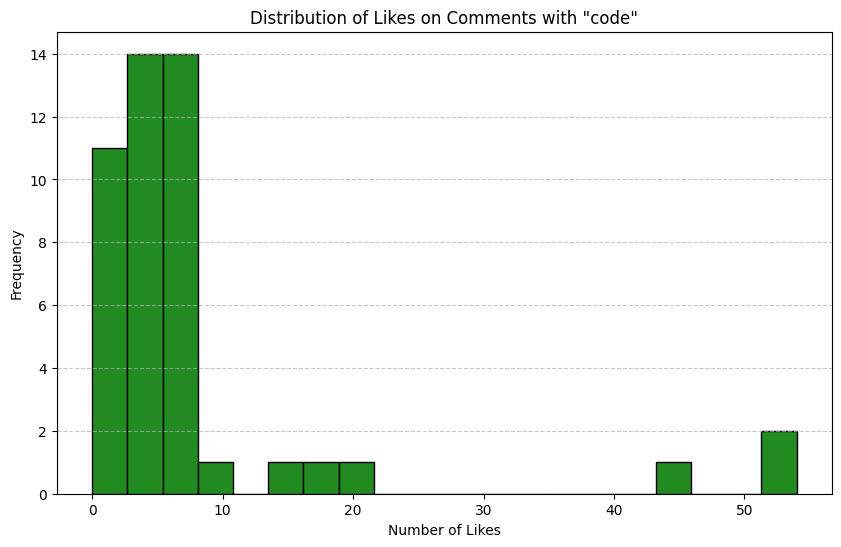

In [42]:

# Filter comments with 'code'
code_comments = df[df['text'].str.contains('code', case=False)]

# Analysing likes on filtered comments
code_likes = code_comments['diggCount']

# summary statistics
print("Summary Statistics for Likes on Comments with 'code':")
print(code_likes.describe())

# Visualizing the data (creating a histogram)
plt.figure(figsize=(10, 6))
plt.hist(code_likes, bins=20, color='forestgreen', edgecolor='black')
plt.title('Distribution of Likes on Comments with "code"')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To understand even better the user engagement, I have analysed how many likes the comments involving the word 'code' have got. How many likes a comment has can indicate that more people are interested in the code than the ones that commented, who are possibly following the replies to the comments asking for the product code. We can see that most comments have between 0 and 10 likes, which means that there are comments with the word 'code' that have 0 likes, while 2 comments containing the word 'code' have around 40 and 50 likes.

We can interpret further from the statistical analysis results that there are 46 comments containing the word 'code' and the average number of likes for these comments is 8. As observed in the histogram, there can also be comments with 0 likes. The maximum number of likes for a comment with the word 'code' is 54.

**Conclusion**

In the end, through this analysis we can conclude that social media has an impact on how much people purchase online or offline by measuring the engagement metrics of users with the selected TikTok content. We can see that a considerable amount of comments are expressing interest in purchasing the product promoted by using the word 'code' to ask for the product code. Furthermore, we can see how content promoting fashion can spark different topics of discussions between the intention to purchase the product and details regarding sizes, fit, style and body shape. Of course, more research can be done on this topic. This project has had its limitations in terms of dataset size and methods. However,using topic modeling, TF-IDF and correlation analysis have been useful in understanding and answering the research question.

References:

Statista. (June 15, 2022). Number of social media users worldwide from 2017 to 2027 (in billions) [Graph]. In Statista. Retrieved December 14, 2023, from https://www.statista.com/statistics/278414/number-of-worldwide-social-network-users/

Manneh, M. (2017). The Influence of Social Media on E-commerce : Fast Fashion Multinational Companies (Dissertation). Retrieved from https://urn.kb.se/resolve?urn=urn:nbn:se:hig:diva-23842

Neuendorf, K. (2017). Measurement and validity. In The Content Analysis Guidebook ( Second ed., pp. 121-164). SAGE Publications, Inc, https://doi.org/10.4135/9781071802878

Kedia, Aman, and Mayank Rasu. Hands-On Python Natural Language Processing : Explore Tools and Techniques to Analyze and Process Text with a View to Building Real-World NLP Applications, Packt Publishing, Limited, 2020. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/lund/detail.action?docID=6241952.

The coding in this syntax has been executed with the help of Open AI specifically ChatGPT free version and the syntaxes provided during class.